# Tuto LOQCathon 

In this tutorial, we will try to cover any basic code to get our hands on Perceval.
The full documentation can be found on [Doc Perceval](https://perceval.quandela.net/).

For any question, feel free to ask !




[I. Introduction](#introduction)\
[II. Linear Optical Circuits](#circuits)\
[III. Simulation](#simulation)\
[IV. Encoding Qubits](#encoding)\
[V. To Go Further](#further)




# I. Introduction <a name="introduction"></a>

### Installation <a name="installation"></a>

In [1]:
## TO-DO : commands to install with pip etc (PE told me it shouldn't be necessary)

import perceval as pcvl
pcvl.__version__

'0.6.1.post78'

In [11]:
## Test :  basic tests to run to check that's been well installed

## EBE : pcvl.__version__ answering a valid version number is a pretty good sign that Perceval lib's been well installed
## Maybe use this cell to import other dependencies
from perceval.components.unitary_components import PS, BS, PERM #, ...
import numpy as np

### BasicStates <a name="basicstates"></a>

In Linear Optical Circuits, photons can have many discrete degrees of freedom, called modes. 
It can be frequency, the polarisation, the position, or all of them.

We represent those degrees of freedom with Fock states. If we have $n$ photons over $m$ modes, the Fock state  : $|s_1,s_2,...,s_m\rangle$ means we have $s_i$ photons in the $i^{th}$ mode. (note that $\sum_{i=1}^n s_i =m$).

In Perceval, we will use the module `pcvl.BasicState`

In [2]:
## Syntax of different BasicState (list, string, etc)
bs1 = pcvl.BasicState('|0,1,0,1>')
bs2 = pcvl.BasicState([0, 1, 0, 1])

## You can iterate on modes
for i, photon_count in enumerate(bs2):
    print(f"There is {photon_count} photon in mode {i}")

## Please add something on the BasicStates if you think we need to developp (as the depreciated version of AnnotedState)

There is 0 photon in mode 0
There is 1 photon in mode 1
There is 0 photon in mode 2
There is 1 photon in mode 3


### LO-Components <a name="components"></a>

The linear optical components are the elementary blocks which will act on our Fock states.

It's important to know all the possible components we can find in Perceval and to understand their action.



In [5]:
## TO-DO : code for each component : label+unitary+drawing+some words on the convention for BS

## Phase shifter
ps = PS(phi=np.pi)

print(ps.name)
print(ps.describe())
pcvl.pdisplay(ps.definition())
pcvl.pdisplay(ps)  # A pdisplay call on a circuit/processor needs to be the last line of a cell

PS
PS(phi=pi)


BS.H() unitary matrix


BS.Rx() unitary matrix


BS.Ry() unitary matrix


BS displays its convention as a small label


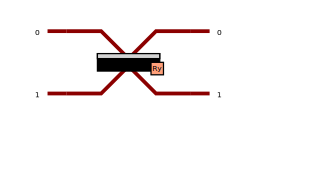

In [8]:
## Beam splitters

bs_h = BS()  # By default a beam splitter follows the Hadamard gate convention
# But other conventions exist too:
bs_rx = BS.Rx()
bs_ry = BS.Ry()

## Check the difference in the unitary definition:
print("BS.H() unitary matrix")
pcvl.pdisplay(bs_h.definition())
print("BS.Rx() unitary matrix")
pcvl.pdisplay(bs_rx.definition())
print("BS.Ry() unitary matrix")
pcvl.pdisplay(bs_ry.definition())
print("BS displays its convention as a small label")
pcvl.pdisplay(bs_ry)

# II. LO-Circuits <a name="circuits"></a>

From the LO-components, we can build a LO-circuit, i.e. a sequence of those components acting on our different modes.

### Syntax

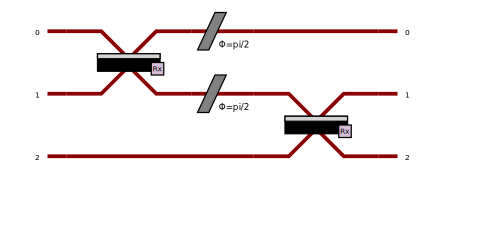

In [24]:
## TO-DO :  code to create a circuit of 3 modes with the components seen above. Print the display. Print the unitary. 
circuit = pcvl.Circuit(3)  # Create a 3 mode circuit

# circuit // BS() // PS(phi=np.pi/2) // (1, PS(phi=np.pi/2)) // (1, BS())

# Equivalent syntax
circuit.add(0, BS()).add(0, PS(phi=np.pi/2)).add(1, PS(phi=np.pi/2)).add(1, BS())

pcvl.pdisplay(circuit.U)
pcvl.pdisplay(circuit)

### Mach-Zehnder Interferometers 

As seen above, we can use Beamsplitters with the reflexivity or the $\theta$ angle as parameters.

In practice, the reflexivity depends on the miror. It's therefore hard... 



In [9]:
## TO-DO : Show MZI circuit, matrix, 


## TO-DO :  note we can use symbolic in our circuits, so we can check the formula ... (introduce the symbolic in unitaries)

## EBE : Since BS convention devel, R is not a BS parameter anymore. If you need to create a BS from a R value, please use:
## BS(BS.r_to_theta(reflectivity_value))
## However, be aware that only theta value is stored inside the BS object

### Universal Circuits

It's important to know that given a unitary $U$ on our modes, it's always possible to find a LO-circuit implementing $U$.

If we want to implement $U=\begin{pmatrix}
a_{1,1} & a_{1,2} & a_{1,3}\\
a_{2,1} & a_{2,2} & a_{2,3} \\ 
a_{3,1} & a_{3,2} & a_{3,3}
\end{pmatrix}$ the operation :

(It's important to precise/remind this unitary is doing the following operation on the Fock state basis:
$\begin{array}{rcl}
|1,0,0\rangle &  \mapsto&  a_{1,1}|1,0,0\rangle + a_{1,2}|0,1,0\rangle + a_{1,3}|0,0,1\rangle\\
|0,1,0\rangle &  \mapsto&  a_{2,1}|1,0,0\rangle + a_{2,2}|0,1,0\rangle + a_{2,3}|0,0,1\rangle\\
|0,0,1\rangle &  \mapsto&  a_{3,1}|1,0,0\rangle + a_{3,2}|0,1,0\rangle + a_{3,3}|0,0,1\rangle
\end{array}$

In [12]:
## code for universal circuit of size 3, for a random U, with the reference of Reck

Historically, the universal form was triangular (quote Reck), then later a rectangular form, with less depth, has been found : [Clements' et al](https://arxiv.org/abs/1603.08788?context=physics) .


In [13]:
## code to generate from random unitary of size n, the universal circuit with rectangular shape

## EBE : Rectangular decomposition is part of a Perceval internal plugin (not available to the public).
## Are you sure we're able to use/show it for the Hackathon
## If so, it's important to tell the dev team to install perceval-internal on the hackathon machines

In [14]:
## TO-do for students  : from random circuit, create circuit with only MZI and phase shifters

### Black Box 

For more readibility and sometimes as we'll need generic operations (see [Encoding]()), it's not always necessary to describe the circuit and explicit all the parameters.


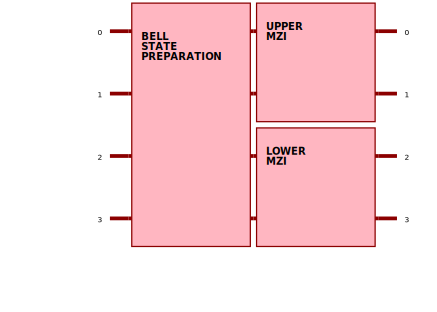

In [15]:
## Code with circuits with balck boxes, with labels, etc

## EBE : example :

pre_MZI = (pcvl.Circuit(4, name="Bell State Preparation")
           .add(0, BS())
           .add(2, BS())
           .add(1, PERM([1, 0])))

upper_MZI = (pcvl.Circuit(2, name="upper MZI")
             .add(0, PS(phi=pcvl.P('phi_0')))
             .add(0, BS())
             .add(0, PS(phi=pcvl.P('phi_2')))
             .add(0, BS()))

lower_MZI = (pcvl.Circuit(2, name="lower MZI")
             .add(0, PS(phi=pcvl.P('phi_1')))
             .add(0, BS())
             .add(0, PS(phi=pcvl.P('phi_3')))
             .add(0, BS()))

chip = (pcvl.Circuit(4)
              .add(0, pre_MZI)
              .add(0, upper_MZI, merge=False)
              .add(2, lower_MZI, merge=False))

pcvl.pdisplay(chip)

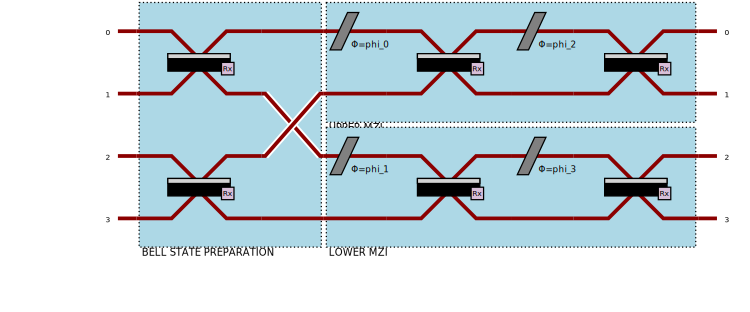

In [16]:
## You can still display the inside of black boxes with:
pcvl.pdisplay(chip, recursive=True)

# III. Simulation <a name="simulation"></a>

From this point, we only created circuits.
It's time to sample from them, and to know the output distribution of them, on many different inputs.



### Computing probabilities 

For this part, we will take the [Hong-Ou-Mandel](https://en.wikipedia.org/wiki/Hong%E2%80%93Ou%E2%80%93Mandel_effect) experience as an instance.



In [29]:
## Code to implement the HOM : |1,1>, circuit = BS, and output the probability of each different output (the code for one probability in particular, and also to iterate through every prob)

## Note: have a version for amplitude & prob

## EBE : I didn't implement the HOM, I've just put the minimal code to compute a prob amplitude
circuit = BS()
backend = pcvl.BackendFactory.get_backend("Naive")
simulator = backend(circuit)
print(simulator.probampli(pcvl.BasicState([1,1]), pcvl.BasicState([2,0])))

## EBE : Or maybe you can use the analyzer (you need to introduce the processor & algorithm concepts)
## But you cannot see/manipulate probability amplitude this way
p = pcvl.Processor("Naive", BS())
analyzer = pcvl.algorithm.Analyzer(p, [pcvl.BasicState([1,1])], '*')
pcvl.pdisplay(analyzer)


0.7071067811865475j


,"|1,1>","|2,0>","|0,2>"
"|1,1>",0,1/2,1/2


In [20]:
## To-do for students :  we give them a 4X4 unitary , we ask for the table of output for the input |1,1,1,0>


## Code to test if the output is correct


### Sampling 

As it's crucial to compute the output distribution, it's not what we can expect from a photonic chip. Indeed, realistically, we only can sample from the distribution.



In [35]:
## Syntax to sample from HOM 

## code to check for 30 runs that we're close to 50%

## EBE : With perfect source

p = pcvl.Processor("SLOS", BS())
p.with_input(pcvl.BasicState([1,1]))
p.mode_post_selection(1)  # We accept that two photons get on the same mode (by default, these states are discarded)
# The sampler holds 'probs', 'sample_count' and 'samples' calls. You can use the one that fits your needs!
sampler = pcvl.algorithm.Sampler(p)
sample_count = sampler.sample_count(1000)
print(sample_count['results'])


{
  |2,0>: 512
  |0,2>: 488
}


In [22]:
## TO-DO for students : implement the code to sample from the 4x4 Unitary of earlier

## Question: how many states do we have for 4 modes and 3 photons?
## Question: how many samples are needed to approximate the distribution?



### Variational algorithm 

In those types of algorithm, the samples from a Quantum circuits allow to approximate an expecation value, which would be use in our loss function, to solve a problem.


In [ ]:
## Create a small exercice with loss function etc. The idea is that they use scipy, minimise, etc, with samples from LO-circuits.
## Can be inspired by [VQE](https://perceval.quandela.net/docs/notebooks/Variational%20Quantum%20Eigensolver.html)
## We have to be careful not to give something too close of the challenges, so maybe we can use a very generic loss function
## Like "minimising the number of photons here with a phase lie that etc"



## TO-Do for students: implement the circuit, loss function depending on samples, and write scipy.minimise(...)

### To go further : connect to a chip

Perceval is also connected to real/physical chips.
Here's the syntax to sample directly from them ! 

(not sure if it's possible, but it would be cool if that was)

In [23]:
## Syntax to run a small circuit and get sampkes from one chip of Quandela

# Encoding Qubits <a name="encoding"></a>

### Path encoding

To perform quantum computing with photons, we need an encodning, that is a correspondance between our Fock states and our qubit states.

We therefore want to associate each qubit state with one of our Fock state.

One natural way to encode qubits is the path encoding.
A qubit is a two quantum states, so we will use two spatial modes to encode it.

The first logical qubit $|0\rangle_L$ will correspond to a photo in the upper mode, so the Fock state $|1,0\rangle$, while $|1\rangle_L$ will be encoded by $|0,1\rangle$.
 

**insert figures of path encodings**


By extension, we can understand that the state of $3$ qubits $\frac{1}{\sqrt{2}}(|000\rangle_L+|111\rangle_L)$ will be encoded with $3$ photons and $3\times 2=6$ modes :
$\frac{1}{\sqrt{2}}(|1,0,1,0,1,0\rangle+|0,1,0,1,0,1\rangle)$

### One-qubit gates

With that enconding, the one qubit gates only deal with one photon and are straightforward. Can you give the LO-circuits for the gates below?

In [2]:
## TO-DO for us : list of one-quibt gates (X, Z, H, RX, RY, RZ) + test to check the circuit for each gate (circuit.U==gate)

## TO-Do for students: find the LO-circuits for each gate

### Two-qubit gates

With that encoding, it can be shown that two-qubit gates can't be deterministic, and have a probability to fail.

There are two ways to detect that failure.

Either we use ancilla, and depending on the state obtained on the ancilla, we know the gate has succeeded on the main qubits.
Those gates will be called heralded.

Either we measure the main qubits, and depending on the state, we know if the gate has succeeded or not.
Those gates will be called postselected.

In the two exercices, we will see the two types: 
- the postselected CNOT of [Ralph et al.](https://arxiv.org/abs/quant-ph/0112088)
- the heralded CNOT of [Knill](https://arxiv.org/abs/quant-ph/0110144)

['heralded cnot', 'postprocessed cnot', 'generic 2 mode circuit']
POSTPROCESSED CNOT DOCUMENTATION
---------------------------------

Scientific article reference: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.65.062324



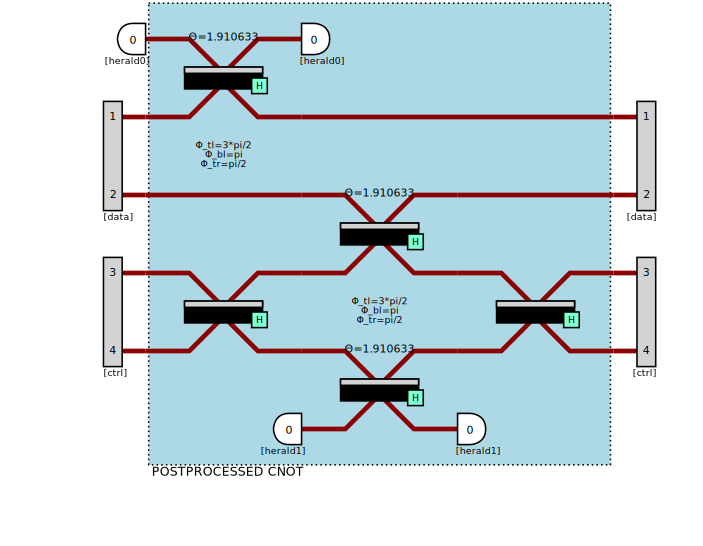

In [43]:
## Ralph's CNOT

## TO-Do for us :  put the image of the circuit + some guidelines

## EBE : We can introduce the component catalog (which is a work in progress..). It already contains both CNOT gates.
from perceval.components import catalog
print(catalog.list())

print(catalog['postprocessed cnot'].doc)
ralph_cnot = catalog['postprocessed cnot'].as_processor().build()

## You can set its input state with a LogicalState
ralph_cnot.with_input(pcvl.LogicalState([0, 0]))

pcvl.pdisplay(ralph_cnot, recursive=True, render_size=1.25)

In [ ]:
## TO-DO for students : reproduce the circuit, and check if perfoms a CNOT

HERALDED CNOT DOCUMENTATION
----------------------------

CNOT gate with 4 heralded modes

Scientific article reference: https://doi.org/10.1073/pnas.1018839108

Schema:
                      ╭─────╮
data (dual rail) ─────┤     ├───── data (dual rail)
                 ─────┤     ├─────
                      │     │
ctrl (dual rail) ─────┤     ├───── ctrl (dual rail)
                 ─────┤     ├─────
                      ╰─────╯



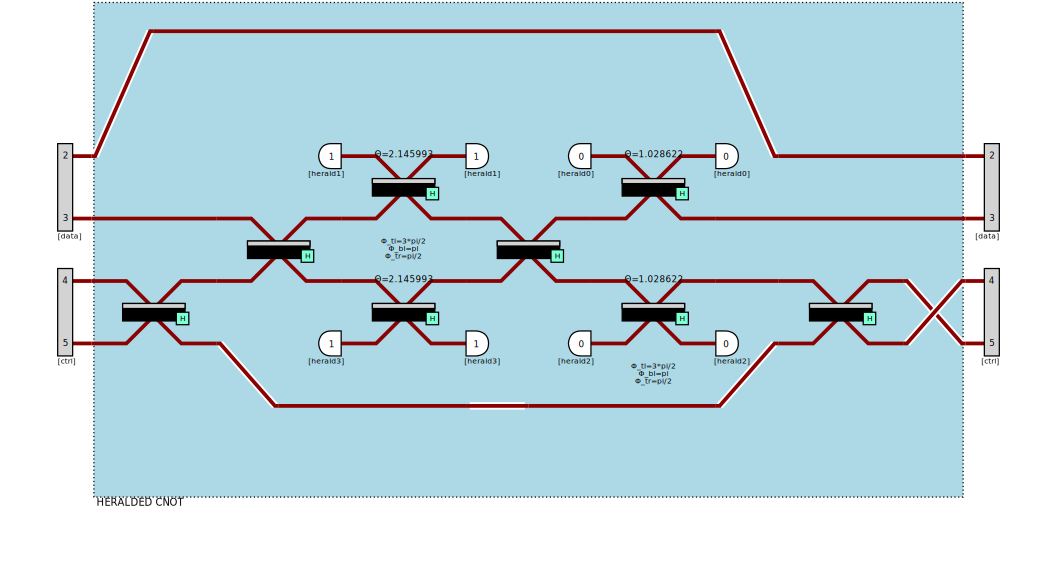

In [39]:
## Knill's CNOT

## TO-Do for us :  put the image of the circuit + some guidelines
print(catalog['heralded cnot'].doc)
knill_cnot = catalog['heralded cnot'].as_processor().build()

pcvl.pdisplay(knill_cnot, recursive=True)


In [ ]:
## TO-DO for students : reproduce the circuit, and check if perfoms a CNOT

### Exercise



In [ ]:
#TO-Do for us : Find a simple quantum circuit

# TO-Do for students : reproduce it in the path-encoding

# To go further  <a name="further"></a>

### Noise

For now, we've only dealt with perfect circuits, with perfect photons/sources/detectors.

A realistic chip is of course far from being perfect. This session is trying to let you model some realistic noises we can encounter.


### Exercise


In [3]:
## TO-DO : model HOM, g2, errors of detection 